In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pathlib import Path
sns.set(style="whitegrid")

In [17]:
def get_supercell_data(data_dir: Path) -> pd.DataFrame:
    """
    data_dir: Diretório contendo pastas ZnO-*.out.
    """
    dados = []
    
    pattern_bloco = r"Forces acting on atoms \(cartesian axes, Ry/au\):\n(.*?)\n\s*The non-local contrib\.  to forces"
    pattern_linha_bloco: Match = r"atom\s+(\d+)\s+type\s+(\d+)\s+force\s*=\s*([-\d.eE]+)\s+([-\d.eE]+)\s+([-\d.eE]+)"

    scf_outputs:list[Path] = list(data_dir.iterdir())

    for scf in scf_outputs:
        sim_id: str = scf.name.replace(".out", "")
        # sim_id: str = scf.stem
        with open(scf) as arquivo:
            conteudo_arquivo = arquivo.read()

            # Análise regex Força
            match_do_bloco: Match = re.search(pattern_bloco, conteudo_arquivo, re.DOTALL)

            # Primeio grupo de forcas 
            bloco_da_forca = match_do_bloco.group(0)
            bloco_da_forca = bloco_da_forca.split('\n')[2:-1]  # Remove as linhas de cabeçalho e rodapé
            bloco_da_forca = [linha.strip() for linha in bloco_da_forca if linha.strip()]  # Remove linhas vazias


            #numero_atomo, tipo_atomo, fx, fy, fz, modulo_forca = extrai_dados_bloco(bloco_da_forca)

            # Análise regex no Bloco
            for linhas in bloco_da_forca:
                match_linha = re.match(pattern_linha_bloco, linhas)
                if match_linha:
                    numero_atomo = int(match_linha.group(1))
                    tipo_atomo = int(match_linha.group(2))
                    
                    fx, fy, fz = match_linha.group(3), match_linha.group(4), match_linha.group(5)
                    modulo_forca = np.linalg.norm([fx, fy, fz])        

                    dados.append({
                            "sim_id": sim_id,
                            "atom_id": numero_atomo,
                            "atom_type": tipo_atomo,
                            "fx_Ry_bohr": fx,
                            "fy_Ry_bohr": fy,
                            "fz_Ry_bohr": fz,
                            "modulo_Ry_bohr": modulo_forca,
                            "modulo_eV_A": modulo_forca * 25.711,
                        })
    dataframe = pd.DataFrame(dados)
    dataframe['label_atom'] = dataframe['atom_type'].map({1: 'Zn', 2: 'O'})
    return dataframe


<h3 style="text-align:center; color:red;">Analisando a variabilidade das forças em uma supercélula</h3>

In [18]:
# Acesso às supercélulas
path = Path('../scripts/data_temp')
supercells_dir: list[Path] = [Path(p) for p in path.iterdir() if p.name.endswith('.out')]
supercells_dir = sorted(supercells_dir)

In [19]:
supercells_dir

[PosixPath('../scripts/data_temp/cell112.out'),
 PosixPath('../scripts/data_temp/cell113.out'),
 PosixPath('../scripts/data_temp/cell121.out'),
 PosixPath('../scripts/data_temp/cell122.out'),
 PosixPath('../scripts/data_temp/cell123.out'),
 PosixPath('../scripts/data_temp/cell131.out'),
 PosixPath('../scripts/data_temp/cell132.out'),
 PosixPath('../scripts/data_temp/cell211.out'),
 PosixPath('../scripts/data_temp/cell212.out'),
 PosixPath('../scripts/data_temp/cell213.out'),
 PosixPath('../scripts/data_temp/cell221.out'),
 PosixPath('../scripts/data_temp/cell222.out'),
 PosixPath('../scripts/data_temp/cell231.out'),
 PosixPath('../scripts/data_temp/cell311.out'),
 PosixPath('../scripts/data_temp/cell312.out'),
 PosixPath('../scripts/data_temp/cell321.out')]

In [20]:
for index, supercell in enumerate(supercells_dir):
    print(f'{index} |  {supercell} |  {supercell.name}')

0 |  ../scripts/data_temp/cell112.out |  cell112.out
1 |  ../scripts/data_temp/cell113.out |  cell113.out
2 |  ../scripts/data_temp/cell121.out |  cell121.out
3 |  ../scripts/data_temp/cell122.out |  cell122.out
4 |  ../scripts/data_temp/cell123.out |  cell123.out
5 |  ../scripts/data_temp/cell131.out |  cell131.out
6 |  ../scripts/data_temp/cell132.out |  cell132.out
7 |  ../scripts/data_temp/cell211.out |  cell211.out
8 |  ../scripts/data_temp/cell212.out |  cell212.out
9 |  ../scripts/data_temp/cell213.out |  cell213.out
10 |  ../scripts/data_temp/cell221.out |  cell221.out
11 |  ../scripts/data_temp/cell222.out |  cell222.out
12 |  ../scripts/data_temp/cell231.out |  cell231.out
13 |  ../scripts/data_temp/cell311.out |  cell311.out
14 |  ../scripts/data_temp/cell312.out |  cell312.out
15 |  ../scripts/data_temp/cell321.out |  cell321.out


In [21]:
cell222 = get_supercell_data(supercells_dir[11])
cell222

,sim_id,atom_id,atom_type,fx_Ry_bohr,fy_Ry_bohr,fz_Ry_bohr,modulo_Ry_bohr,modulo_eV_A,label_atom
0,ZnO-3.27-1.61-222,1,1,0.00000029,0.00000017,0.00005986,0.000060,0.001539,Zn
1,ZnO-3.27-1.61-222,2,1,0.00000000,0.00000027,0.00006109,0.000061,0.001571,Zn
2,ZnO-3.27-1.61-222,3,2,0.00000032,0.00000019,-0.00006067,0.000061,0.001560,O
3,ZnO-3.27-1.61-222,4,2,-0.00000000,-0.00000047,-0.00005992,0.000060,0.001541,O
4,ZnO-3.27-1.61-222,5,1,-0.00000025,-0.00000014,0.00006357,0.000064,0.001634,Zn
...,...,...,...,...,...,...,...,...,...
3867,ZnO-3.53-1.58-222,28,2,0.00000040,0.00000023,-0.00005995,0.000060,0.001541,O
3868,ZnO-3.53-1.58-222,29,1,0.00000000,0.00000038,0.00006351,0.000064,0.001633,Zn
3869,ZnO-3.53-1.58-222,30,1,-0.00000260,-0.00000150,0.00006018,0.000060,0.001549,Zn
3870,ZnO-3.53-1.58-222,31,2,0.00000000,0.00000003,-0.00006200,0.000062,0.001594,O


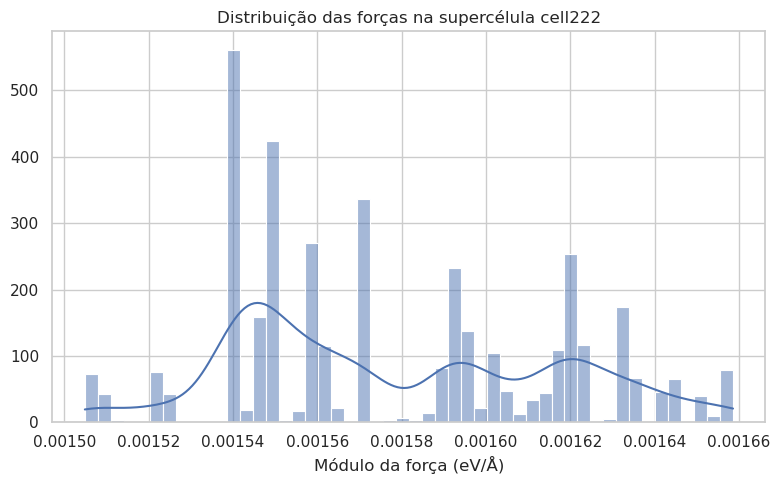

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(cell222['modulo_eV_A'], kde=True, bins=50)
plt.xlabel("Módulo da força (eV/Å)")
plt.ylabel("")
plt.title(f"Distribuição das forças na supercélula {supercells_dir[11].stem}")
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
for supercelular in supercells_dir:
    try:
        cell_data = get_supercell_data(supercelular)
        print(f"\033[92mProcessado corretamente: {supercelular.stem}\033[0m")
    except Exception as e:
        print(f"\033[91mERRO {e}: {supercelular.stem}\033[0m")

Processado corretamente: cell112
Processado corretamente: cell113
ERRO 'NoneType' object has no attribute 'group': cell121
ERRO 'NoneType' object has no attribute 'group': cell122
Processado corretamente: cell123
ERRO 'NoneType' object has no attribute 'group': cell131
Processado corretamente: cell132
Processado corretamente: cell211
ERRO 'NoneType' object has no attribute 'group': cell212
Processado corretamente: cell213
Processado corretamente: cell221
Processado corretamente: cell222
Processado corretamente: cell231
Processado corretamente: cell311
Processado corretamente: cell312
Processado corretamente: cell321


In [24]:
cell112 = get_supercell_data(supercells_dir[0]) 
cell113 = get_supercell_data(supercells_dir[1])
#cell121 = get_supercell_data(supercells_dir[2])
#cell122 = get_supercell_data(supercells_dir[3])
cell123 = get_supercell_data(supercells_dir[4])
#cell131 = get_supercell_data(supercells_dir[5])
cell132 = get_supercell_data(supercells_dir[6])
cell211 = get_supercell_data(supercells_dir[7])
#cell212 = get_supercell_data(supercells_dir[8])
cell213 = get_supercell_data(supercells_dir[9]) 
cell221 = get_supercell_data(supercells_dir[10])
cell222 = get_supercell_data(supercells_dir[11])
cell231 = get_supercell_data(supercells_dir[12])
cell311 = get_supercell_data(supercells_dir[13])
cell312 = get_supercell_data(supercells_dir[14])
cell321 = get_supercell_data(supercells_dir[15])     

In [25]:
# Lista dos dataframes e seus nomes correspondentes
dfs = [
    ('cell112', cell112),
    ('cell113', cell113),
    ('cell123', cell123),
    ('cell132', cell132),
    ('cell211', cell211),
    ('cell213', cell213),
    ('cell221', cell221),
    ('cell222', cell222),
    ('cell231', cell231),
    ('cell311', cell311),
    ('cell312', cell312),
    ('cell321', cell321)
]

# Adiciona a coluna "Supercélula" em cada dataframe
for name, df in dfs:
    df['Supercélula'] = name

# Concatena todos em um único dataframe
base_de_dados = pd.concat([df for _, df in dfs], ignore_index=True)

In [26]:
base_de_dados

,sim_id,atom_id,atom_type,fx_Ry_bohr,fy_Ry_bohr,fz_Ry_bohr,modulo_Ry_bohr,modulo_eV_A,label_atom,Supercélula
0,ZnO-3.20-1.49-112,1,1,0.00000000,0.00000000,0.00006042,0.000060,0.001553,Zn,cell112
1,ZnO-3.20-1.49-112,2,1,0.00000000,-0.00000000,0.00005235,0.000052,0.001346,Zn,cell112
2,ZnO-3.20-1.49-112,3,2,0.00000000,0.00000000,-0.00006304,0.000063,0.001621,O,cell112
3,ZnO-3.20-1.49-112,4,2,0.00000000,0.00000000,-0.00006186,0.000062,0.001590,O,cell112
4,ZnO-3.20-1.49-112,5,1,0.00000000,0.00000000,0.00007235,0.000072,0.001860,Zn,cell112
...,...,...,...,...,...,...,...,...,...,...
28067,ZnO-3.27-1.68-321,20,2,-0.00000165,-0.00000012,-0.00006308,0.000063,0.001622,O,cell321
28068,ZnO-3.27-1.68-321,21,1,-0.00000111,0.00000430,0.00006644,0.000067,0.001712,Zn,cell321
28069,ZnO-3.27-1.68-321,22,1,-0.00001779,-0.00001207,0.00006098,0.000065,0.001662,Zn,cell321
28070,ZnO-3.27-1.68-321,23,2,0.00000053,-0.00000011,-0.00006356,0.000064,0.001634,O,cell321


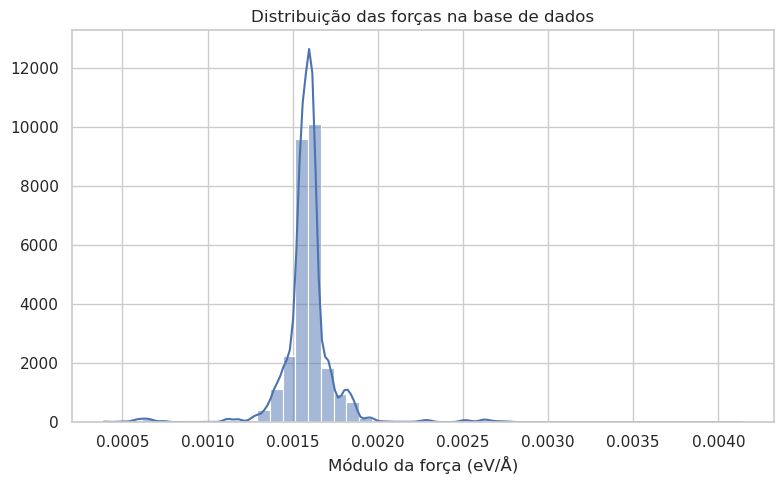

In [27]:
plt.figure(figsize=(8,5))
sns.histplot(base_de_dados['modulo_eV_A'], kde=True, bins=50)
plt.xlabel("Módulo da força (eV/Å)")
plt.ylabel("")
plt.title(f"Distribuição das forças na base de dados")
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
base_de_dados

,sim_id,atom_id,atom_type,fx_Ry_bohr,fy_Ry_bohr,fz_Ry_bohr,modulo_Ry_bohr,modulo_eV_A,label_atom,Supercélula
0,ZnO-3.20-1.49-112,1,1,0.00000000,0.00000000,0.00006042,0.000060,0.001553,Zn,cell112
1,ZnO-3.20-1.49-112,2,1,0.00000000,-0.00000000,0.00005235,0.000052,0.001346,Zn,cell112
2,ZnO-3.20-1.49-112,3,2,0.00000000,0.00000000,-0.00006304,0.000063,0.001621,O,cell112
3,ZnO-3.20-1.49-112,4,2,0.00000000,0.00000000,-0.00006186,0.000062,0.001590,O,cell112
4,ZnO-3.20-1.49-112,5,1,0.00000000,0.00000000,0.00007235,0.000072,0.001860,Zn,cell112
...,...,...,...,...,...,...,...,...,...,...
28067,ZnO-3.27-1.68-321,20,2,-0.00000165,-0.00000012,-0.00006308,0.000063,0.001622,O,cell321
28068,ZnO-3.27-1.68-321,21,1,-0.00000111,0.00000430,0.00006644,0.000067,0.001712,Zn,cell321
28069,ZnO-3.27-1.68-321,22,1,-0.00001779,-0.00001207,0.00006098,0.000065,0.001662,Zn,cell321
28070,ZnO-3.27-1.68-321,23,2,0.00000053,-0.00000011,-0.00006356,0.000064,0.001634,O,cell321


| Aspecto                                | Indicação                                                                 |
| -------------------------------------- | ------------------------------------------------------------------------- |
| Baixa variabilidade                    | A base está "concentrada" perto do equilíbrio                             |
| Pouca diversidade                      | Pouco útil para treinar redes neurais robustas para deslocamentos grandes |
| Excelente para checar convergência SCF | Quase todas as forças estão abaixo de 0.002 eV/Å                          |


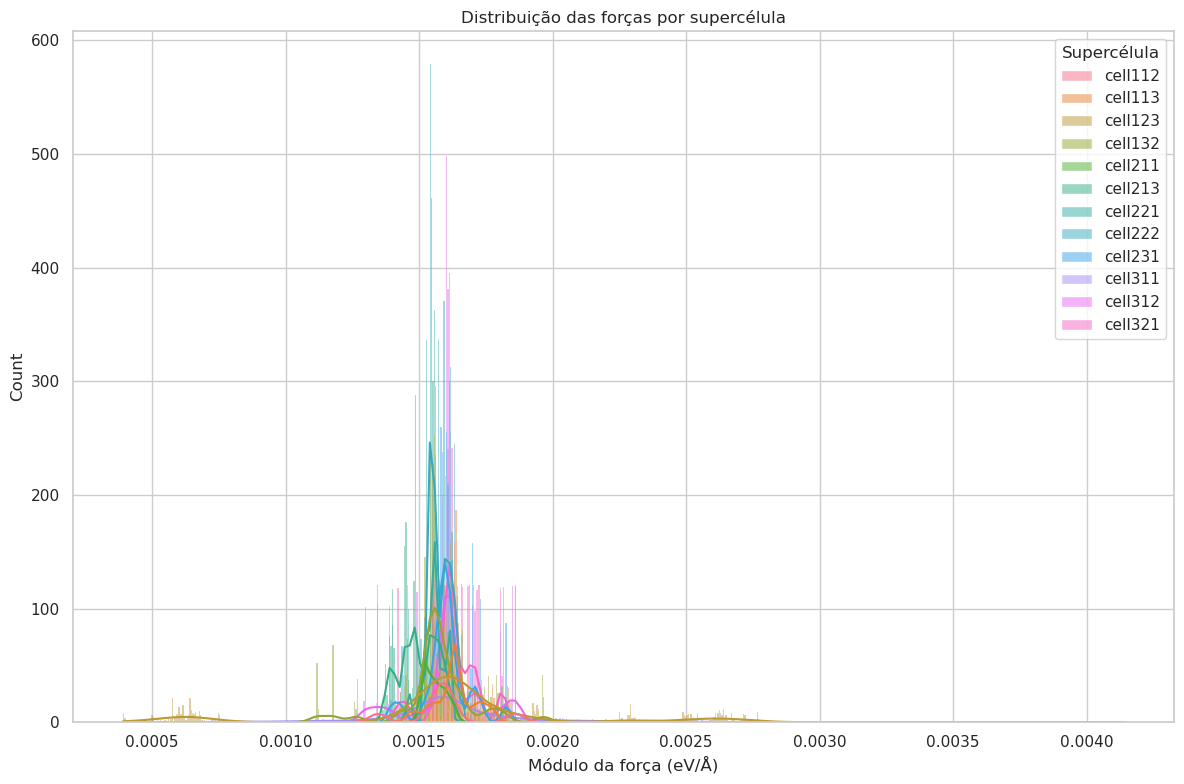

In [30]:
plt.figure(figsize=(12,8))
plt.title(f"Distribuição das forças por supercélula")

plt.ylabel("")
plt.xlabel("Módulo da força (eV/Å)")

sns.histplot(data=base_de_dados, x="modulo_eV_A", hue="Supercélula", kde=True)
plt.tight_layout()
plt.show()

In [34]:
import plotly.express as px

fig = px.histogram(
    base_de_dados,
    x="modulo_eV_A",
    color="Supercélula",
    nbins=100,
    opacity=0.6,
    #marginal="rug",  # ou "box", "violin" se quiser mais visualizações
    hover_data=base_de_dados.columns  # mostra mais info ao passar o mouse
)

fig.update_layout(
    title="Distribuição das forças por supercélula",
    xaxis_title="Módulo da força (eV/Å)",
    yaxis_title="Contagem",
    bargap=0.05,
    template="plotly_white"
)

fig.show()
